<div style="font-size:40px;">
Hauptkomponenten und Faktorenanalyse
</div>

# Einleitung Hauptkomponenten
<div style="text-align: justify;">
    
Vorgehensweise Hauptkomponentenanalyse (stark an dem Buch orientiert,  bei manchen Zeilen ist head verwendet worden, um das Maximum von 100 Seiten eher erreichen zu können.):

- Daten einlesen

- Hauptkomponentenanalyse vornehmen (mit und ohne princomp):
  - Liegt ein hochdimensionaler Datensatz vor, der in einem niedrigdimensionalen Raum dargestellt werden soll.
  - Erfüllen die Daten die Voraussetzungen (mindestens eines davon): Alle Merkmale sind quantitativ, die Daten liegen als Varianz-Kovarianz-Matrix oder Korrelationsmatrix vor.
  - Die Hauptkomponentenanalyse soll auf Basis der Varianz-Kovarianz-Matrix oder Korrelatiosnmatrix durchgeführt werden.
  - Die Eigenwerte und Eigenvektoren werden bestimmt.
  - Auswahl der Hauptkomponenten: Anteil der Gesamtstreuung, die durch die Hauptkomponenten erklärt wird, Kaiser-Kriterium, Jolliffe-Kriterium, Scree-Plot
  - Darstellung der minimal spannenden Bäume, grafische Beuteilung in R^2.
  - Hauptkomponenten interpretieren.
    
</div>


# Statistisches Vorgehen Hauptkomponenten

## Vorgehensweise ohne princomp Varianz
<div style="text-align: justify;">
Die Kovarianzmatrix und Korrelationsmatrix in Vergleich bringen.
</div>

In [10]:
# Daten einlesen
# Verwendung des Datensatzes rock
rock_data <- data.frame(rock)
head(rock_data)
# Berechnung der Varianz-Kovarianzmatrix
cov(rock_data)

# Berechnung der Korrelationsmatrix
cor(rock_data)

,area,peri,shape,perm
,<int>,<dbl>,<dbl>,<dbl>
1,4990,2791.90,0.0903296,6.3
2,7002,3892.60,0.1486220,6.3
3,7558,3930.66,0.1833120,6.3
4,7352,3869.32,0.1170630,6.3
5,7943,3948.54,0.1224170,17.1
6,7979,4010.15,0.1670450,17.1


,area,peri,shape,perm
area,7203044.71232,3160367.49330,-40.820823047,-466063.55213
peri,3160367.49330,2049653.68934,-51.775231267,-463032.47715
shape,-40.82082,-51.77523,0.006971657,20.35164
perm,-466063.55213,-463032.47715,20.351635275,191684.79915


,area,peri,shape,perm
area,1.0000000,0.8225064,-0.1821611,-0.3966370
peri,0.8225064,1.0000000,-0.4331255,-0.7387158
shape,-0.1821611,-0.4331255,1.0000000,0.5567208
perm,-0.3966370,-0.7387158,0.5567208,1.0000000


### Resultat Vorgehensweise ohne princomp Varianz
<div style="text-align: justify;">
    
- Die Varianzen sind: 7203044.71232, 2049653.68934, 0.006971657, 191684.79915. Da sich diese stark unterscheiden, wird die Korrelationsmatrix für die weiteren Berechnungen verwendet.
</div>

## Vorgehensweise ohne princomp Kriterien
<div style="text-align: justify;">
Ohne dem princomp Befehl sollen nun die Hauptkomponenten bestimmt werden, die den Datzensatz am besten repräsentieren.
</div>

In [11]:
library(ggplot2)
# Eigenwerte und Eigenvektoren berechnen

eig <- eigen(cor(rock_data))$values
eig
eigenv <- eigen(cor(rock_data))$vectors
eigenv

[1] 2.60896150 0.92291959 0.39605650 0.07206241

-0.4744238,-0.6046129,0.37639417,0.51739034
-0.5886286,-0.2366588,-0.06308377,-0.77040862
0.3932268,-0.7054215,-0.58863352,-0.03554881
0.5232697,-0.2842821,0.71264188,-0.37082890


Die Bestimmung der Eignwerte und Eigenvektoren sind der erste Schritt.

In [12]:
library(ggplot2)
# Anteil der Gesamtstreuung, die durch die Hauptkomponenten erklärt wird
first <- 100*(eig[1]/(sum(eig[1]+eig[2]+eig[3]+eig[4])))
second <- 100*((eig[1]+eig[2])/(sum(eig[1]+eig[2]+eig[3]+eig[4])))
third <- 100*((eig[1]+eig[2]+eig[3])/(sum(eig[1]+eig[2]+eig[3]+eig[4])))
fourth <- 100*((eig[1]+eig[2]+eig[3]+eig[4])/(sum(eig[1]+eig[2]+eig[3]+eig[4])))
first
second
third
fourth

[1] 65.22404

[1] 88.29703

[1] 98.19844

[1] 100

Die Werte erhöhen sich, was logisch ist. Nimmt man alle Hauptkomponenten kann man die ganze Varianz des Datensatzes repräsentieren, hat aber nichts eingespart. Mit der Hinzunahme von zwei der Hauptkomponenten kann man 88.3% der Totalvarianz beibehalten.


Dies sind die beiden Kriterien in Vergleich.

In [13]:
# Kaiser Kriterium, Mittelwert der Eigenwerte
kaiser <- (eig[1]+eig[2]+eig[3]+eig[4])/4
kaiser

# Jolliffe-Kriterum, Mittelwert * 0.7
jolliffe <- 0.7 * kaiser
jolliffe

[1] 1

[1] 0.7

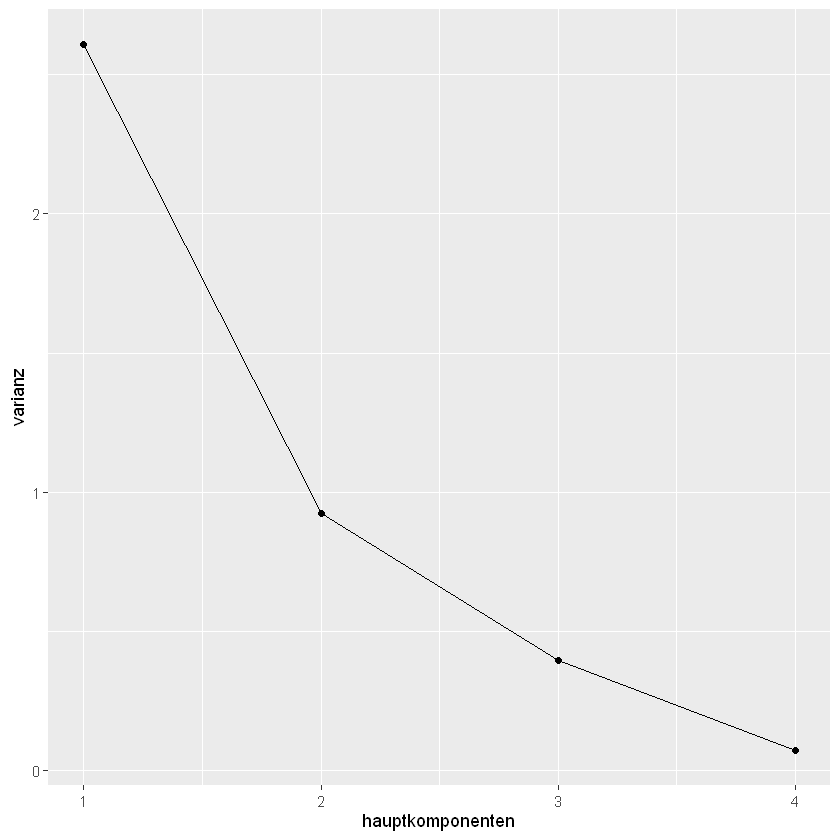

In [14]:
# Scree-Plot
frame <- data.frame(hauptkomponenten = c(1,2,3,4), varianz = c(eig[1], eig[2], eig[3], eig[4]))
   
ggplot(data=frame, aes(x=hauptkomponenten, y=varianz, group=1)) +
  geom_line()+
  geom_point()

### Resultat Vorgehensweise ohne princomp Kriterien
<div style="text-align: justify;">
    
- Nimmt man eine Grenze von 80% an, erfüllen zwei Hauptkomponenten, eig[1] = 2.608961 und eig[2] = 0.9229196 die Voraussetzung. Mit der Variable second kann man dies erfüllen: second = 88.29703.

- Nimmt man das Kaiser-Kriterium an, so muss in diesem Fall der Eigenwert grösser als 1 sein, denn der Mittelwert ist 0.9999 und dies ist der einzige Eigenwert, der diesen Mittelwert überschreitet und dies mit 2.60896149658739.  eig[1] = 2.608961 erfüllt diese Voraussetzung. Dies spricht für eine Hauptkomponente, man benötigt nur eine Hauptkomponente.

- Nimmt man das Jolliffe-Kriterium an, so muss in diesem Fall der Eigenwert grösser als 0.7 sein, eig[1] = 2.60896150 und eig[2] = 0.92291959 erfüllen die Voraussetzung. Diese beiden erreichen ebenfalls erneut die 88.29703%.

- Ein wirklicker Knick ist im Scree-Plot nicht zu erkennen. Meistens kann dieser Plot verwendet werden, um die zu verwendenden Hauptkomponenten bestimmen zu können. Meisten erkennt man dabei einen Knick.

</div>

## Vorgehensweise mit princomp
<div style="text-align: justify;">
Mit princomp Befehl sollen nun die Hauptkomponenten bestimmt werden, die den Datzensatz am besten repräsentieren.
</div>

In [15]:
install.packages("vegan")
library(vegan)
# Berechnung der Eigenwerte
e <- princomp(rock_data, cor=TRUE)
eig2 <-e$sdev^2
eig2

Warning message:
"package 'vegan' is in use and will not be installed"


Comp.1     Comp.2     Comp.3     Comp.4 
2.60896150 0.92291959 0.39605650 0.07206241

Anbei erkennt man dieselben Eigenwerte, sprich die Hauptkomponenten, wie man sie ohne princomp errechnen kann.

In [16]:
# Kaiser Kriterium, Mittelwert der Eigenwerte
kaiser2 <- mean(eig2)
kaiser2

# Jolliffe-Kriterum, Mittelwert * 0.7
jolliffe2 <- 0.7 * mean(eig2)
jolliffe2

[1] 1

[1] 0.7

Anbei erkennt man dieselben Werte, wie bei den Resultaten ohne princomp.

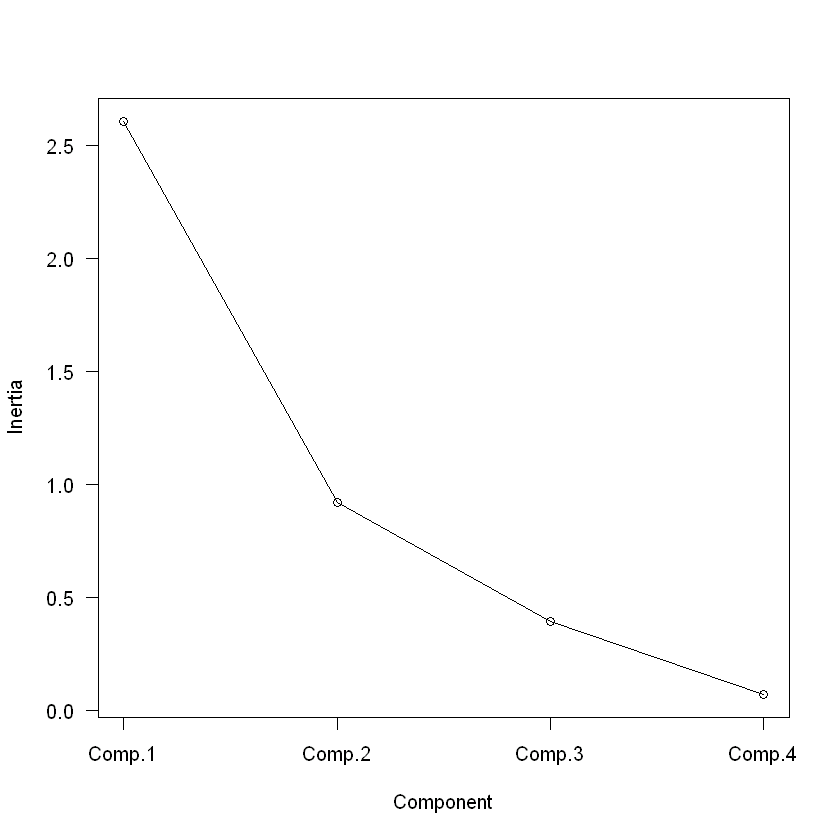

In [17]:
# Scree-Plot
par(las=1)
screeplot(e, type="l", main="")

Dieser Scree-Plot sieht genau so aus wie der Scree-Plot ohne princomp.

In [18]:
# Summary
summary(e)

# Die Hauptkomponenten
loadings(e)

Importance of components:
                          Comp.1    Comp.2     Comp.3    Comp.4
Standard deviation     1.6152280 0.9606870 0.62933020 0.2684444
Proportion of Variance 0.6522404 0.2307299 0.09901413 0.0180156
Cumulative Proportion  0.6522404 0.8829703 0.98198440 1.0000000


Loadings:
      Comp.1 Comp.2 Comp.3 Comp.4
area   0.474  0.605  0.376  0.517
peri   0.589  0.237        -0.770
shape -0.393  0.705 -0.589       
perm  -0.523  0.284  0.713 -0.371

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

Auch hier erkennt man dieselben Werte wie bei den Berechnungen ohne princomp. Die Werte bei "Cumulative Proportion" entsprechen den Variablen first, second, third und fourth. Dies sind ebenfalls 65.22404 88.29703 98.198440 100.00000 Prozent.
Die Loadings erklären wie stark diese den Hauptkomponenten beisteuern, sprich welche am winchtigsten sind, den Datensatz in der gekürzten Version darstellen.

Comp.1,Comp.2,Comp.3,Comp.4
0.7553055,-1.8414783,-0.07902806,-0.08261715
1.2946396,-0.7018505,-0.25818326,-0.31430060
1.2446762,-0.2727316,-0.42822279,-0.24160439
1.4976909,-0.8955061,0.01729743,-0.21987529
1.5976575,-0.6949249,0.07715245,-0.15936618
1.4172878,-0.2954063,-0.23843681,-0.20505878


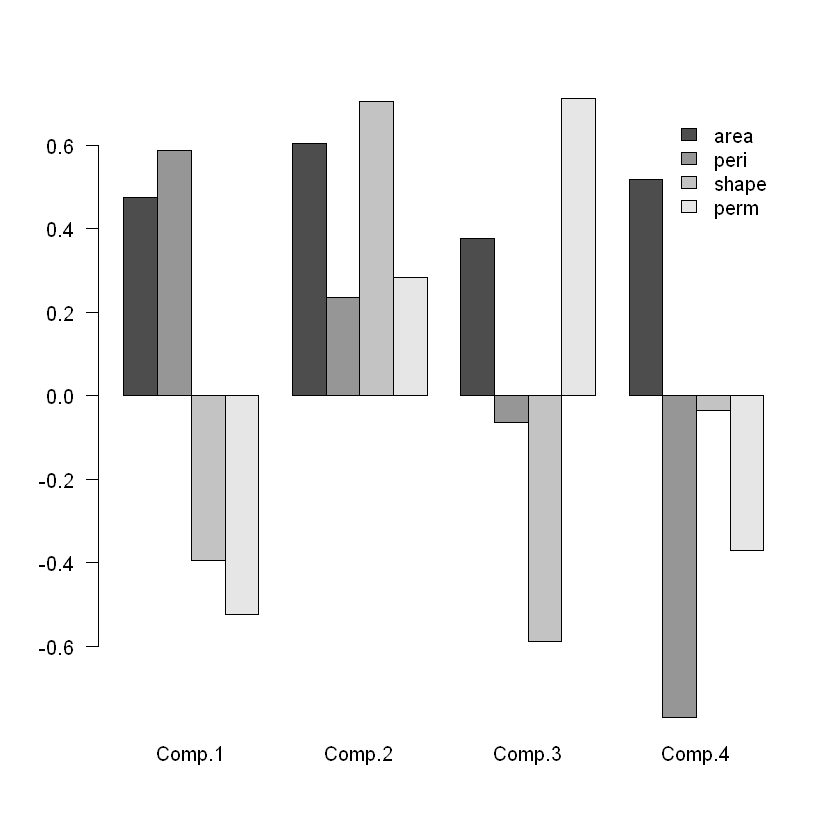

In [19]:
# Barplot mit Hauptkomponenten
par(las=1)
barplot(loadings(e), beside=TRUE, legend=colnames(rock_data), args.legend=list(bty="n"))

# Scores
head(e$scores)

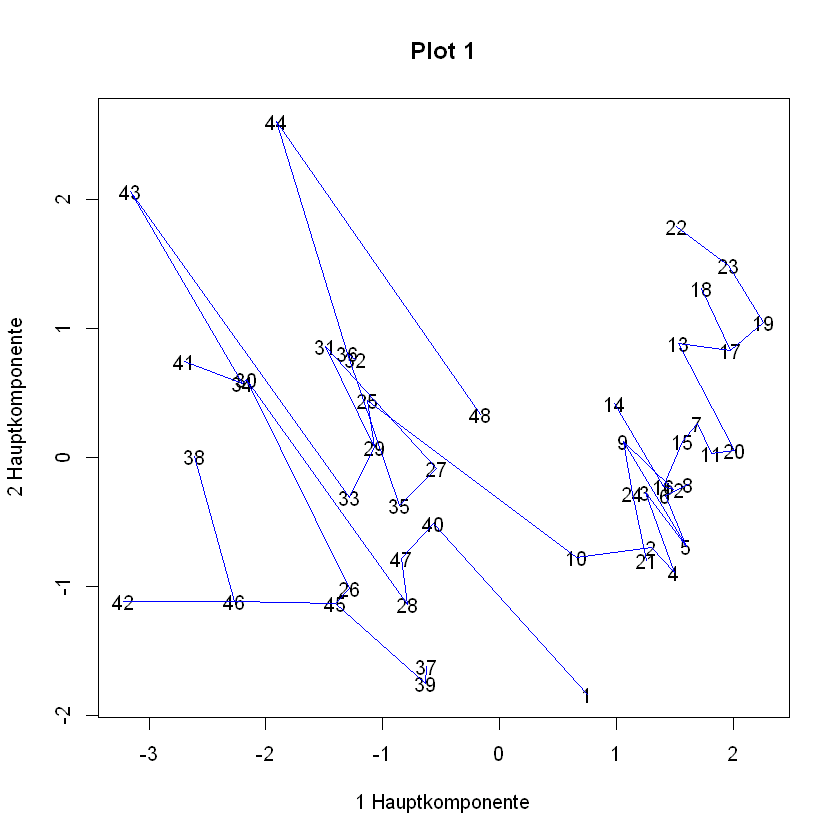

In [20]:
# Plot 1 der Scores in den zwei Hauptkomponenten
plot(e$scores, xlab="1 Hauptkomponente", ylab="2 Hauptkomponente", type="n", main="Plot 1")
text(e$scores,rownames(e$scores))

# Minimal spantree of rock_data
sp_tree <- spantree(dist(rock_data, method = "euclidean"))
distance1 <- dist(rock_data, method = "euclidean")

for (x in 2:48){
line1x <- c(e$scores[,1][x],e$scores[,1][sp_tree$kid[x-1]])
line1y <- c(e$scores[,2][x],e$scores[,2][sp_tree$kid[x-1]])
lines(line1x, line1y, pch = 18, col = "blue", type ="l", lty = 1)
}

Dies ist der Plot, wie es generiert wird anhand der Anleitung S. 154 des Kuhlenkasper "Multivariate Analysemethode".

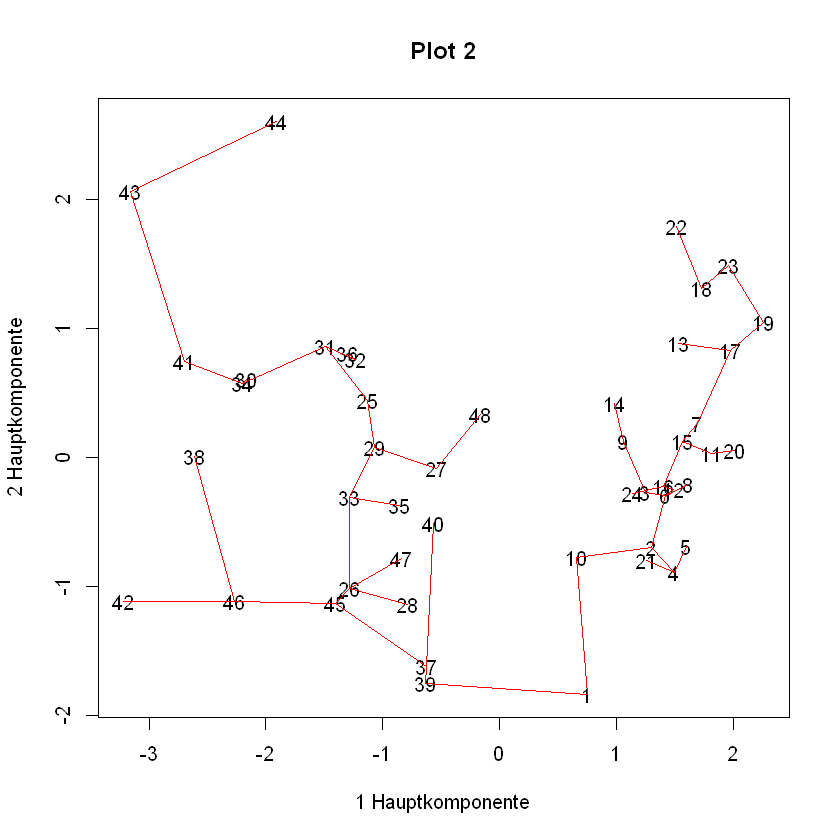

In [21]:
# Plot 2 der Scores in den zwei Hauptkomponenten
plot(e$scores, xlab="1 Hauptkomponente", ylab="2 Hauptkomponente", type="n", main="Plot 2")
text(e$scores,rownames(e$scores))

# Minimal spantree of scores
sp_tree2 <- spantree(dist(e$scores, method = "euclidean"))
distance2 <- dist(e$scores, method = "euclidean")

for (x in 2:48){
line1x <- c(e$scores[,1][x],e$scores[,1][sp_tree2$kid[x-1]])
line1y <- c(e$scores[,2][x],e$scores[,2][sp_tree2$kid[x-1]])
lines(line1x, line1y, pch = 18, col = "red", type ="l", lty = 1)
}

Die ist der Plot unter Berücksichtigung der Scores.

### Resultat Vorgehensweise mit princomp
<div style="text-align: justify;">

- Mit princomp sind es dieselben Resultate, wie bei den obigen Berechnungen ohne princomp. Das heisst die Eigenwerte sind dieselben und folglich die darauf aufbauenden Berechnungen.

- Mit dem Summary kann man erkennen, dass mit den drei Hauptkomponenten 98.2% der Gesamtstreuung erklärt werden können. Mit den ersten beiden Hauptkomponenten kann man 88.3% der Gesamstreuung erklären. Mit der eigens gesetzten Grenze von 80% oder dem Jolliffe-Kriterum würden diese beiden ausreichen. Kaiser wiederum würde nur eine Hauptkomponente angeben, wie bereits erwähnt.

- Die Variable area ist stark in der zweiten Hauptkomponente vokrommende, peri bei der ersten Hauptkomponente, shape bei der zweiten Hauptkomponente und perm bei der dritten Hauptkomponente. Inwieweit die Variable perm bei der Auswahl von nur zwei Hauptkomponenten dann noch gut genug erklärt werden kann wird nicht weiter untersucht.

- Mit dem Barplot kann man erkennen, welche Variable am meisten zur Hauptkomponente beisteuert und in welcher Richtung. Bei der Hauptkomponenten 1 area und peri, die in positiver Richung gehen und shape und perm in die negative Richtung. Peri und perm haben den grössten Einfluss. Bei der Hauptkomponente 2 ist es shape in positiver Richtung. Bei der Hauptkomponente 3 ist es perm in positiver Richtung und shape in negativer Richgung. Bei der Hauptkomponente 4 ist es peri in negativer Richtung.

- Plot 1 stellt den minimal spannenden Baum dar, den man erhält, wenn man die Distanzen anhand des Datensatzes berechnet. Plot 2 stellt den minimal spannenden Baum dar, wenn ma die Distanzen anhand der Scores berechnet. Also einmal dist(rock_data) und einmal dist(e$scores).

- Beide Plots unterscheiden sich doch sehr und somit kann anhand der grafischen Beurteilung gesagt werden, dass diese beiden Hauptkomponenten Probleme liefern und somit den Datensatz weniger gut repräsentieren. Es ist etwas schwierig zu beurteilen, weil im Buch auf Seite 148 (Handl, Kuhlenkasper) zwar auch auf Fehler eingegangen wird, aber nicht erklärt, inwieweit Fehler vorhanden sein dürfen. Es gibt keine angegebene Grenze, die klar aufzeigt, dass die Hauptkomponenten den Datensatz besser oder weniger gut repräsentieren. Somit könnte auch gesagt werden, dass der Plotvergleich positiv ausfällt.

- Mit distance1 und distance2 könnte man die Distanzmatrizen nebst der grafischen Beurteilung vergleichen.

- Die Interpretation der beiden Hauptkomponenten: Ist dieselbe wie bei dem bereits erwähnten Barplot.
</div>

## Check der Spantree
<div style="text-align: justify;">
Nun soll der Datensatz normalisiert und standardisiert werden, um darin eine grafische Übereinstimmung des Plot 1 und Plot 2 zu erreichen. Die Übereinstimmung ist wichtig, damit die Qualität des PCA bewertet werden kann.
</div>

Installing package into 'C:/Users/olivi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'normalize' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\olivi\AppData\Local\Temp\Rtmp6hlsNn\downloaded_packages


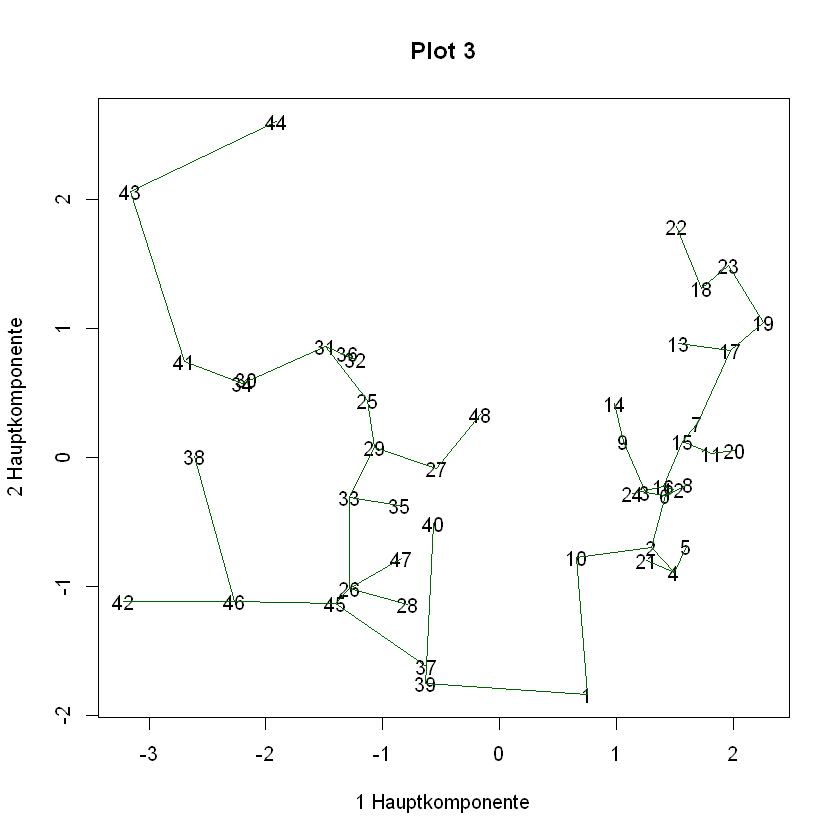

In [22]:
# Normalize installieren und aufrufen
install.packages("normalize")
library("normalize")

# Plot 3 der Scores in den zwei Hauptkomponenten
plot(e$scores, xlab="1 Hauptkomponente", ylab="2 Hauptkomponente", type="n", main="Plot 3")
text(e$scores,rownames(e$scores))

# Normalisieren (Methode standardize)
distance_c1 <- normalize(rock_data, method="standardize")

# Minimal spantree of rock_data
sp_tree3 <- spantree(dist(distance_c1, method = "euclidean"))
distance3 <- dist(distance_c1, method = "euclidean")

for (x in 2:48){
line2x <- c(e$scores[,1][x],e$scores[,1][sp_tree3$kid[x-1]])
line2y <- c(e$scores[,2][x],e$scores[,2][sp_tree3$kid[x-1]])
lines(line2x, line2y, pch = 18, col = "darkgreen", type ="l", lty = 1)
}

Plot nach dem Normalisieren

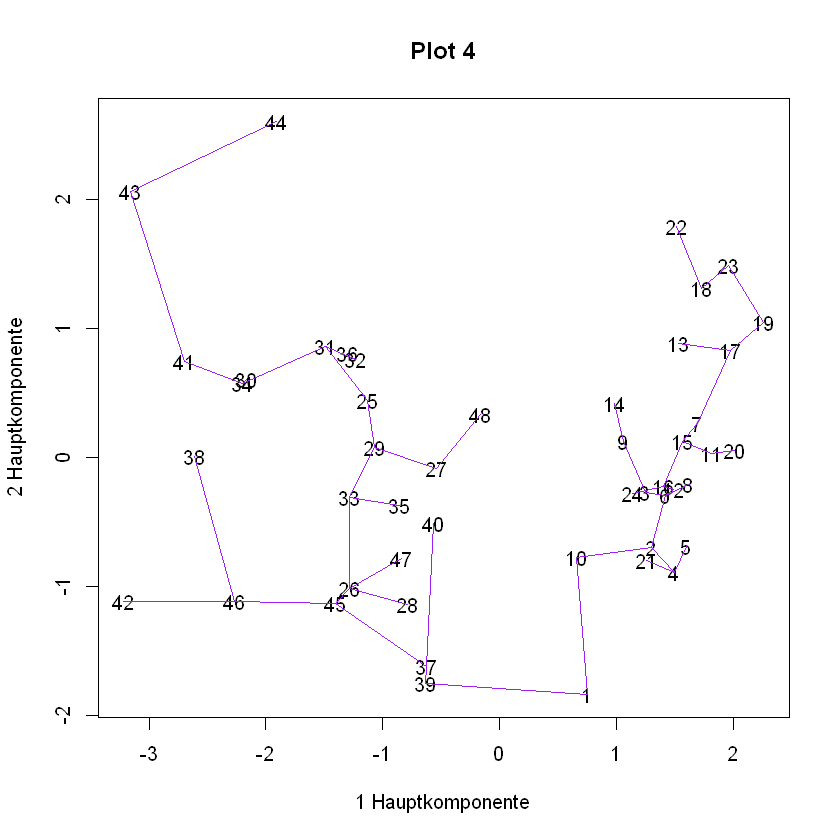

In [23]:
# Plot 4 der Scores in den zwei Hauptkomponenten
plot(e$scores, xlab="1 Hauptkomponente", ylab="2 Hauptkomponente", type="n", main="Plot 4")
text(e$scores,rownames(e$scores))

# Standardisieren
distance_c2 <- scale(rock_data)

# Minimal spantree of rock_data
sp_tree4 <- spantree(dist(distance_c2, method = "euclidean"))
distance4 <- dist(distance_c2, method = "euclidean")

for (x in 2:48){
line3x <- c(e$scores[,1][x],e$scores[,1][sp_tree4$kid[x-1]])
line3y <- c(e$scores[,2][x],e$scores[,2][sp_tree4$kid[x-1]])
lines(line3x, line3y, pch = 18, col = "purple", type ="l", lty = 1)
    }

Plot nach dem Skalieren

### Resultat Check der Spantree
<div style="text-align: justify;">
    
- Nach dem Normalisieren des Datensatzes (standardize), stimmen die Plots überein. Also der Plot 2 aus dem vorangegangenen Beispiel und Plot 3 aus diesem Beispiel. Somit gibt es keine Problem oder Fehler mehr, nach dem Normalisieren.

- Nach dem Skalieren des Datensatzes (standardize), stimmen die Plots überein. Also der Plot 2 aus dem vorangegangenen Beispiel und Plot 4 aus diesem Beispiel. Somit gibt es keine Problem oder Fehler mehr, nach dem Normalisieren.

- Normalisieren und skalieren hat hier dasselbe Resultat.

- Die dazugehörige Distazmatrix kann mit distance3, distance4 abgerufen werden.

</div>

# Einleitung Faktorenanalyse
<div style="text-align: justify;">
    
Vorgehensweise Explorative Faktorenanalyse (stark an dem Buch orientiert):

- Bestimmung der Bestimmtheitsmasse
- Ersetzung der Hauptdiagonalen
- Berechung der Eigenwerte
- Index Bestimmung der Eigenwerte
- Faktoanalyse vornehmen ohne Rotation
- Faktoanalyse vornehmen mit Rotation
- Interpretation
    
</div>


# Statistisches Vorgehen Faktorenanalyse
<div style="text-align: justify;">
</div>

## Explorative Faktorenanalyse
<div style="text-align: justify;">

</div>

In [24]:
# Bestimmung der Bestimmtheitsmasse
rquadrat <- 1/diag(solve(cor(rock_data)))
rquadrat

rh <- cor(rock_data)

# Ersetzung der Hauptdiagonalen
diag(rh) <- rquadrat

# Berechung der Eigenwerte
ew <- eigen(rh)
ew

# Index Bestimmung der Eigenwerte
index <- min((1:length(ew$values))[cumsum(ew$values)>sum(ew$values)])
index


area      peri     shape      perm 
0.2195485 0.1184853 0.6707662 0.2955897

eigen() decomposition
$values
[1]  1.9049653  0.3969537 -0.2379407 -0.7595885

$vectors
           [,1]        [,2]        [,3]        [,4]
[1,] -0.4394835 -0.53748163  0.49993926  0.51771464
[2,] -0.5385453 -0.30148074  0.01705795 -0.78663041
[3,]  0.4908081 -0.78719910 -0.37098543 -0.04236459
[4,]  0.5252910 -0.02324736  0.78239349 -0.33375050


[1] 1

In [25]:
# Faktoanalyse vornehmen ohne Rotation
f1 <- factanal(covmat=cor(rock_data), factors=1, rotation="none")
f1
f1$loadings

# Faktoanalyse vornehmen mit Rotation
f2 <- factanal(covmat=cor(rock_data), factors=1, rotation="varimax")
f2
f2$loadings


Call:
factanal(factors = 1, covmat = cor(rock_data), rotation = "none")

Uniquenesses:
 area  peri shape  perm 
0.324 0.005 0.812 0.455 

Loadings:
      Factor1
area   0.822 
peri   0.998 
shape -0.434 
perm  -0.738 

               Factor1
SS loadings      2.405
Proportion Var   0.601

The degrees of freedom for the model is 2 and the fit was 0.5614 


Loadings:
      Factor1
area   0.822 
peri   0.998 
shape -0.434 
perm  -0.738 

               Factor1
SS loadings      2.405
Proportion Var   0.601


Call:
factanal(factors = 1, covmat = cor(rock_data), rotation = "varimax")

Uniquenesses:
 area  peri shape  perm 
0.324 0.005 0.812 0.455 

Loadings:
      Factor1
area   0.822 
peri   0.998 
shape -0.434 
perm  -0.738 

               Factor1
SS loadings      2.405
Proportion Var   0.601

The degrees of freedom for the model is 2 and the fit was 0.5614 


Loadings:
      Factor1
area   0.822 
peri   0.998 
shape -0.434 
perm  -0.738 

               Factor1
SS loadings      2.405
Proportion Var   0.601

### Resultat Explorative Faktorenanalyse
<div style="text-align: justify;">

- Gemäss der Bestimmung des Indexes kann gesehen werden, dass nur ein Faktor zu verwenden ist. Die Faktoranalyse mit und ohne Rotation bestätigt dies, beide Resultate sind dieselben.  

- Factor1 ist stark postiv assoziiert mit peri und area, stark negativ assoziiet mit perm. 60.1% der Varianz kann mit diesem einen Faktor erhalten/erklärt werden.

- PCA eröffnet mehr Möglichkeiten, sei dies bei einer Auswahl einer eigenen Grenze, also beispielweise die erwähnten 80%, das Kaiser-Kriterium, oder das Jolliffe-Kriterium. Mit PCA bewegen wir und zwischen der Auswahl einer Hauptkomponente oder zwischen der Auswahl von zwei Komponenten oder mehr, sollte man mehr Varianz erhalten wollen.

- EFA zeigt direkt über die Indexbestimmung an, wieviele Faktoren es sein sollen.In diesem Fall einen.
</div>

# Beschreibung Ergebnisse
<div style="text-align: justify;">
Die Ergebnisse kommen alle bei den bereits erwähnten Resultaten vor.
</div>

# Analyse/Hinterfragen Ergebnisse
<div style="text-align: justify;">
Die Analyse der Ergebnisse kommt bei den bereits erwähnten Resultaten vor.
</div>

# Quellenangaben
<div style="text-align: justify;">

-   Daten von R (24.12.2024)

 - Andreas Handl, Torben Kuhlenkasper. (2017) Multivariate Analysemethoden (3. Auflage). Springer Spektrum.
</div>